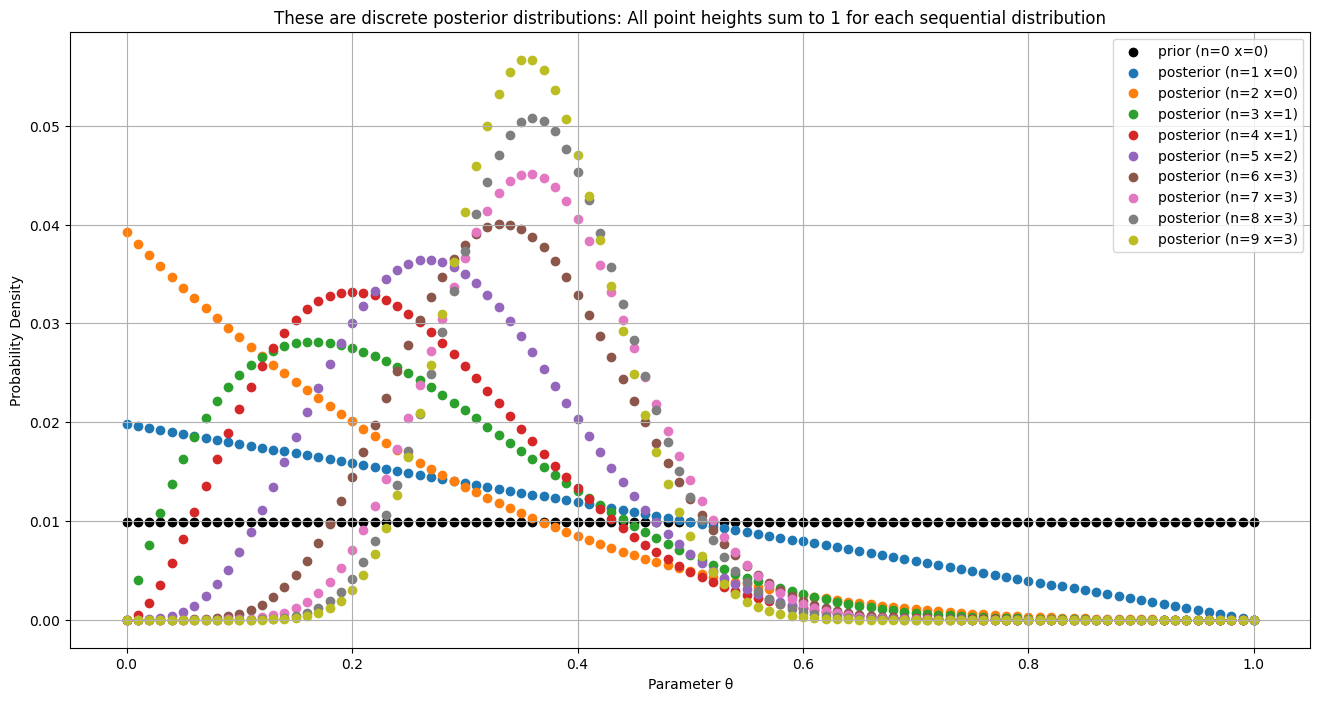

In [3]:
# Q1

import numpy as np; from scipy import stats; import matplotlib.pyplot as plt

parameter_domain = np.linspace(0,1,101) 
prior = np.ones(101)/101 

observations = 0,0,1,0,1,1,0,0,0
n,x = 0,0
plt.figure(figsize=(16,8))
plt.scatter(parameter_domain, prior, label="prior (n="+str(n)+" x="+str(x)+")", color='k')
plt.title("These are discrete posterior distributions: All point heights sum to 1 for each sequential distribution")

for observation in observations:
    n += 1
    x += observation
    likelihood = parameter_domain**x * (1-parameter_domain)**(n-x) 
    posterior = likelihood * prior  
    posterior /= np.sum(posterior)
    prior = posterior
    plt.scatter(parameter_domain, posterior, label="posterior (n="+str(n)+" x="+str(x)+")")

plt.legend()
plt.xlabel('Parameter θ')
plt.ylabel('Probability Density')
plt.grid(True)
plt.show()

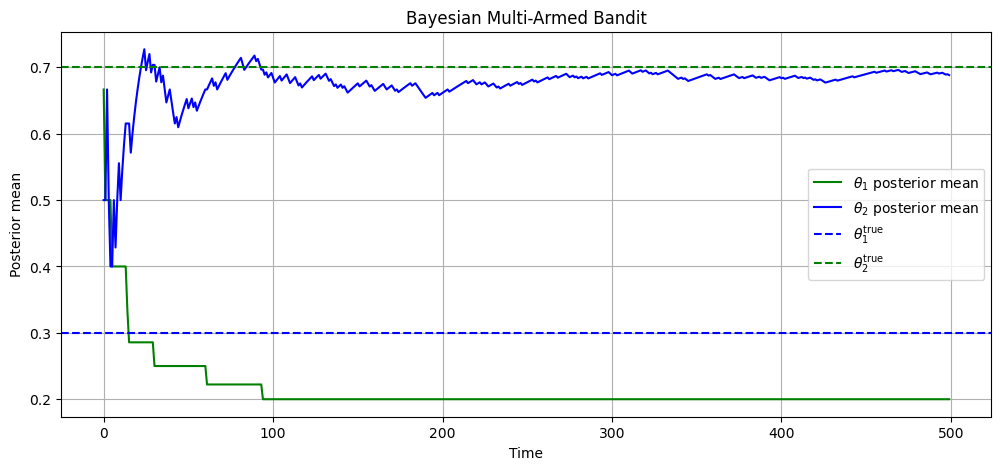

Final estimate of theta1: 0.200
Final estimate of theta2: 0.688


In [19]:
#Q2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# True values for each arm
theta1true = 0.3  
theta2true = 0.7  

# Prior parameters for both arms (uniform priors)
alpha1, beta1 = 1, 1  
alpha2, beta2 = 1, 1 

# Success and trial counts for each arm
n1, x1 = 0, 0  
n2, x2 = 0, 0  
m = 500
samples = 1000  

# Lists to store posterior means for both arms
posterior_mean_arm1 = []
posterior_mean_arm2 = []

for t in range(m):
     # Sample theta from the Beta distribution for both arms
    theta1samples = beta.rvs(alpha1 + x1, beta1 + n1 - x1, size=samples)
    theta2samples = beta.rvs(alpha2 + x2, beta2 + n2 - x2, size=samples)

    # Calculate the probability that theta1 < theta2
    prob_theta1_lessthan_theta2 = np.mean(theta1samples < theta2samples)

    # Select which arm to pull based on the probability calculated
    if np.random.rand() < prob_theta1_lessthan_theta2: # Pull arm 2
        success = np.random.rand() < theta2true
        n2 += 1
        x2 += success
    else: # Pull arm 1
        success = np.random.rand() < theta1true
        n1 += 1
        x1 += success

    # Update the posterior mean for both arms
    posterior_mean_arm1.append((alpha1 + x1) / (alpha1 + beta1 + n1))
    posterior_mean_arm2.append((alpha2 + x2) / (alpha2 + beta2 + n2))

plt.figure(figsize=(12, 5))
plt.plot(posterior_mean_arm1, label=r"$\theta_1$ posterior mean", color="green")
plt.plot(posterior_mean_arm2, label=r"$\theta_2$ posterior mean", color="blue")
plt.axhline(theta1true, color="blue", linestyle="--", label=r"$\theta_1^{\text{true}}$")
plt.axhline(theta2true, color="green", linestyle="--", label=r"$\theta_2^{\text{true}}$")
plt.xlabel("Time")
plt.ylabel("Posterior mean")
plt.title("Bayesian Multi-Armed Bandit")
plt.legend()
plt.grid()
plt.show()

# Print final estimates for both arms
print(f"Final estimate of theta1: {(alpha1 + x1) / (alpha1 + beta1 + n1):.3f}")
print(f"Final estimate of theta2: {(alpha2 + x2) / (alpha2 + beta2 + n2):.3f}")

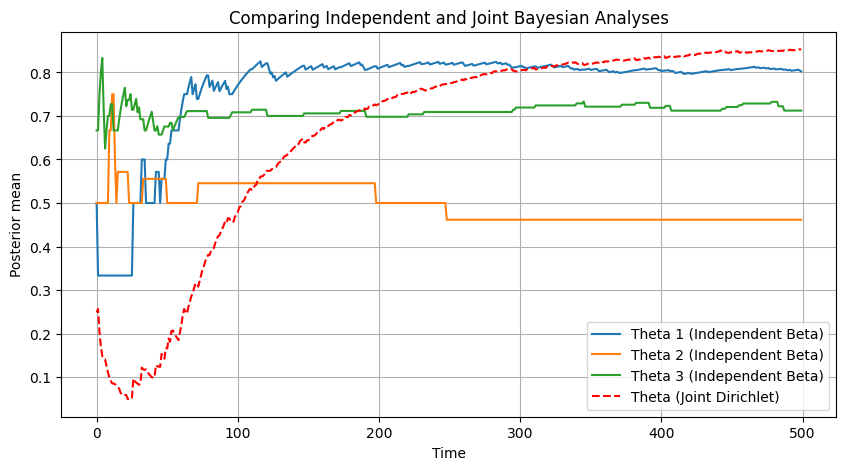

Final posterior mean estimates (Independent Beta-Binomial):
Theta 1: 0.802
Theta 2: 0.462
Theta 3: 0.712

Final posterior mean estimate for Theta (Joint Dirichlet): 0.853


In [20]:
#Q3
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, dirichlet

# Actual success probabilities for the three entities
theta_true = [0.8, 0.3, 0.7]  

# Setting prior parameters for Beta distributions (for Independent Analysis)
alphaprior = [1, 1, 1]  
betaprior = [1, 1, 1]  

# Counters for the number of successes and trials for each entity
n = [0, 0, 0]  
x = [0, 0, 0] 
a = 500  
samples = 1000  
epsilon = 1e-3  

# Storage for posterior means for each entity
posterior_mean_inde = [[] for _ in range(3)]
posterior_mean_joint = []

for t in range(a):
    # ---- Analysis 1: Independent Beta-Binomial Model ----
    thetasamples = [beta.rvs(alphaprior[i] + x[i], betaprior[i] + n[i] - x[i], size=samples) for i in range(3)]
    
    # Compute the probability that Entity 1 has the highest posterior
    prob_theta1_highest = np.mean((thetasamples[0] > thetasamples[1]) & (thetasamples[0] > thetasamples[2]))
    
   
    if np.random.rand() < prob_theta1_highest:
        chosen = 0
    elif np.random.rand() < np.mean((thetasamples[1] > thetasamples[2])):
        chosen = 1
    else:
        chosen = 2
    
   # Simulate success or failure for the chosen entity based on its true success probability
    success = np.random.rand() < theta_true[chosen]
    success = np.random.rand() < theta_true[chosen]
    n[chosen] += 1
    x[chosen] += success

    # Store posterior means for Independent Analysis after each iteration
    for i in range(3):
        posterior_mean_inde[i].append((alphaprior[i] + x[i]) / (alphaprior[i] + betaprior[i] + n[i]))

    # ---- Analysis 2: Joint Dirichlet-Multinomial Model ----
    dirichletparams = [alphaprior[i] + x[i] + epsilon for i in range(3)]
    dirichletposterior = dirichlet.rvs(dirichletparams, size=samples)
    
    # Calculate the probability that Entity 1 has the best posterior given the joint model
    prob_theta1_joint = np.mean((dirichletposterior[:, 0] > dirichletposterior[:, 1]) & 
                                     (dirichletposterior[:, 0] > dirichletposterior[:, 2]))
    
    # Store the joint posterior mean for Entity 1
    posterior_mean_joint.append(np.mean(dirichletposterior[:, 0]))

# Visualizing the results
plt.figure(figsize=(10, 5))

# Plot posterior means for Independent Beta-Binomial Analysis
for i in range(3):
    plt.plot(posterior_mean_inde[i], label=f"Theta {i+1} (Independent Beta)")

# Plot the posterior mean for the Joint Dirichlet-Multinomial Model 
plt.plot(posterior_mean_joint, label="Theta (Joint Dirichlet)", linestyle="--", color="red")


plt.xlabel("Time")
plt.ylabel("Posterior mean")
plt.title("Comparing Independent and Joint Bayesian Analyses")
plt.legend()
plt.grid()
plt.show()


print("Final posterior mean estimates (Independent Beta-Binomial):")
for i in range(3):
    print(f"Theta {i+1}: {(alphaprior[i] + x[i]) / (alphaprior[i] + betaprior[i] + n[i]):.3f}")

print(f"\nFinal posterior mean estimate for Theta (Joint Dirichlet): {posterior_mean_joint[-1]:.3f}")


If the entities being tested are independent , the Independent Beta-Binomial model is more suitable; if the entities are interdependent or affect each other, the Joint Dirichlet-Multinomial model is more effective.In an e-commerce personalized recommendation system, the Bayesian multi-armed bandit effectively balances the exploration-exploitation tradeoff: by exploring different recommendation algorithms and collecting data, while also exploiting the best-performing algorithm to maximize user engagement and sales. This method continuously learns user preferences and adapts in a dynamic environment.